In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
url = "https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv"
application_df = pd.read_csv(url)
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop non-beneficial columns
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.tail()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


In [4]:
# Encoding categorical variables
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [5]:
# Split features and target
X = application_df.drop(columns=['IS_SUCCESSFUL']).values
y = application_df['IS_SUCCESSFUL'].values

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define the optimized model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=128, input_dim=X_train.shape[1]))
nn.add(tf.keras.layers.LeakyReLU(alpha=0.01))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=64, activation='tanh'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=32))
nn.add(tf.keras.layers.LeakyReLU(alpha=0.01))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
nn.summary()

c:\Users\fitse\anaconda3\envs\fitenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\fitse\anaconda3\envs\fitenv\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        14,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,857 (101.00 KB)

 Trainable params: 25,857 (101.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Implement ModelCheckpoint callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("optimized_weights.weights.h5", save_weights_only=True, save_freq=5*len(X_train)//32)

In [10]:
# Train the model
history = nn.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=120,
    batch_size=32,
    verbose=2,
    callbacks=[checkpoint_cb]
)

Epoch 1/120
686/686 - 3s - 4ms/step - accuracy: 0.7197 - loss: 0.5680 - val_accuracy: 0.7403 - val_loss: 0.5506
Epoch 2/120
686/686 - 2s - 3ms/step - accuracy: 0.7281 - loss: 0.5533 - val_accuracy: 0.7400 - val_loss: 0.5442
Epoch 3/120
686/686 - 2s - 3ms/step - accuracy: 0.7290 - loss: 0.5502 - val_accuracy: 0.7403 - val_loss: 0.5436
Epoch 4/120
686/686 - 2s - 3ms/step - accuracy: 0.7291 - loss: 0.5485 - val_accuracy: 0.7413 - val_loss: 0.5419
Epoch 5/120
686/686 - 2s - 2ms/step - accuracy: 0.7304 - loss: 0.5478 - val_accuracy: 0.7405 - val_loss: 0.5461
Epoch 6/120
686/686 - 2s - 2ms/step - accuracy: 0.7321 - loss: 0.5460 - val_accuracy: 0.7376 - val_loss: 0.5441
Epoch 7/120
686/686 - 2s - 3ms/step - accuracy: 0.7323 - loss: 0.5447 - val_accuracy: 0.7396 - val_loss: 0.5435
Epoch 8/120
686/686 - 1s - 2ms/step - accuracy: 0.7328 - loss: 0.5445 - val_accuracy: 0.7389 - val_loss: 0.5405
Epoch 9/120
686/686 - 2s - 3ms/step - accuracy: 0.7320 - loss: 0.5429 - val_accuracy: 0.7378 - val_loss:

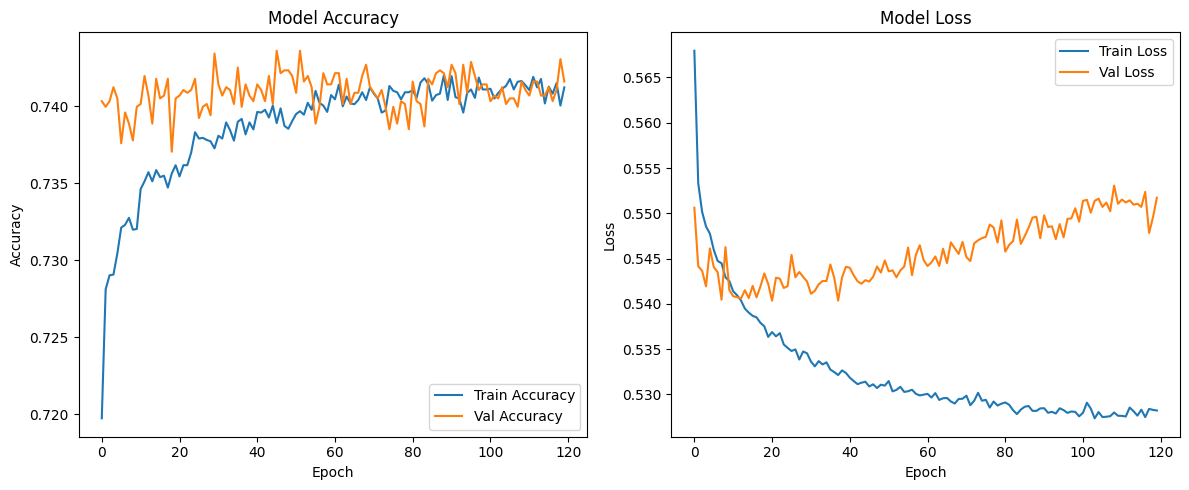

In [14]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

#  Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("accuracy_loss_plot.png")
plt.show()

In [15]:
# Evaluate model performance
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - 1ms/step - accuracy: 0.7292 - loss: 0.5637
Loss: 0.5636518001556396, Accuracy: 0.7291545271873474


In [16]:
# Save optimized model
nn.save("AlphabetSoupCharity_Optimization.h5")